Note: The underlying assumption is that user inputs forecasted revenue in million of dollars scaling! 

Please, provide forecasted revenue: 
300
Please, provide forecasted revenue deviation (in this case, provide percentage please): 
30
Please, provide forecasted COGS, % : 
50
Please, provide forecasted COGS deviation, % : 
30
Please, provide forecasted operational expenses, %: 
30
Please, provide forecasted operational expenses deviation, %: 
30
Please, provide other forecasted expenses, %: 
10
Please, provide forecasted tax rate, %: 
30


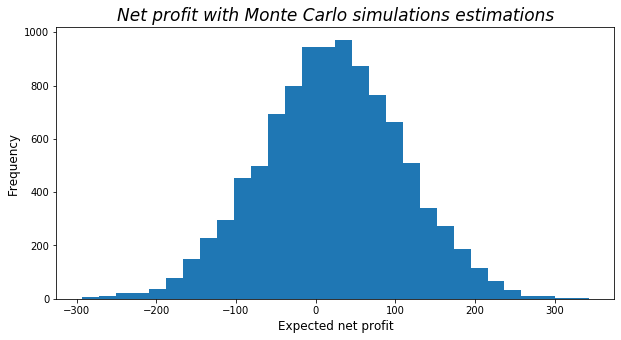

The mean net profit after 5000 simulations is:  20.16 $ 

Minimum possible net profit (worst-case scenario) after 5000 simulations is:  -293.71 $ 

Maximum possible net profit (best-case scenario) after 5000 simulations is:  343.08 $ 

Without applying the model, the expected net profit would be 21.0 $ 



In [276]:
# Basic program that uses Monte Carlo simulations to perform sensitivity analysis to predict EBITDA.
# It takes predictions as an input and then predicts EBITDA
# Monte Carlo simulations are performed based on assumption that net profit distribution follows a normal one, since 
# the number of simulations is way more than 40.

#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt

#declaring needed variables
n = 100
monte_list1 = []


#asking user/manager to provide the program with required predictions
#such as revenue, revenue standard deviation, COGS and its deviation, operations expenses and its deviation
# and tax rate as well

print("Note: The underlying assumption is that user inputs forecasted revenue in million of dollars scaling! \n")
rev = int(input('Please, provide forecasted revenue: \n'))
rev_std = int(input('Please, provide forecasted revenue deviation (in this case, provide percentage please): \n'))

#getting percentage inputs and turning them into decimals for calculation purposes
COGS= float(input('Please, provide forecasted COGS, % : \n'))
COGS = COGS/100

COGS_std = float(input('Please, provide forecasted COGS deviation, % : \n'))
COGS_std = COGS_std/100

oper= float(input('Please, provide forecasted operational expenses, %: \n'))
oper = oper/100

oper_std = float(input('Please, provide forecasted operational expenses deviation, %: \n'))
oper_std = oper_std/100

other_exp = float(input('Please, provide other forecasted expenses, %: \n'))
other_exp = other_exp/100

tax = float(input('Please, provide forecasted tax rate, %: \n'))
tax = tax/100


#main function, respobsible for performing Monte Carlo simulations
def simulations(q):

    #function that takes # of iterations as input and then perform that number of Monte Carlo simulations inside;
    
    def monte_carlo_net(ite):

        rev1 = np.random.normal(rev, rev_std, ite)         #revenue modelling

        COGS_est = (rev1 * np.random.normal(COGS, COGS_std)) #COGS modelling

        Gross_profit = rev1 - COGS_est                       #gross profit modelling based on rev and COGS results

        oper_est  = (rev1 * np.random.normal(oper, oper_std)) #operations expense modelling

        EBITDA = Gross_profit - oper_est                    #EBITDA modelling

        net_profit = (1 - tax) * (EBITDA - (other_exp*rev1)) #net profit modelling

        return net_profit.mean()                            #returns the mean of all given # of iterations' results

    
    #calculations of mean of the list
    def Average(l): 
        return sum(l) / len(l)    


    #function that performs another loop of operations using monte_carlo_net function output to get more precise results
    def monte_sim1(n):
        for i in range(n):
            a = monte_carlo_net(ite)
            monte_list1.append(a)

            
            
    #start of running program; calculation performed in monte_carlo_net are passed into monte_sim1, then getting into
    #this loop; all of the above operations give a pretty reliable precision
    
    for i in range(100):
        monte_sim1(n)
    
    #plotting expected profit distribution via histogram 
    plt.figure(figsize = (10,5))
    plt.hist(monte_list1, bins = 30)
    plt.xlabel("Expected net profit", size = 12)
    plt.ylabel("Frequency", size = 12)
    plt.title("Net profit with Monte Carlo simulations estimations", fontsize=17, color='black', style='italic' )
    plt.show()

    #returns average, max and min results of the simulation results
    return Average(monte_list1), min(monte_list1), max(monte_list1)



#returns results and graph for 5000 Monte Carlo simulations
store_values = simulations(5000)

#prints the expected result that is based just on initial predictions, not subject to simulations
exp_res = (rev - COGS*rev - oper*rev - rev * other_exp) * (1-tax)

#prints mean, min and max results, as well as exp_res
print("The mean net profit after 5000 simulations is: ", round(store_values[0], 2), "$ \n")
print("Minimum possible net profit (worst-case scenario) after 5000 simulations is: ", round(store_values[1], 2), "$ \n")
print("Maximum possible net profit (best-case scenario) after 5000 simulations is: ", round(store_values[2], 2), "$ \n")

print("Without applying the model, the expected net profit would be", round(exp_res,2),"$ \n")



In [266]:
exp_res = (rev - COGS*rev - oper*rev - rev * other_exp) * (1-tax)
exp_res

21.0